## Reference:
https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

https://towardsdatascience.com/automatic-machine-learning-in-fraud-detection-using-h2o-automl-6ba5cbf5c79b

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from C:\Users\luoyan011\.conda\envs\nlp\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LUOYAN~1\AppData\Local\Temp\tmptujokuo4
  JVM stdout: C:\Users\LUOYAN~1\AppData\Local\Temp\tmptujokuo4\h2o_luoyan011_started_from_python.out
  JVM stderr: C:\Users\LUOYAN~1\AppData\Local\Temp\tmptujokuo4\h2o_luoyan011_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.6
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_luoyan011_d94vg4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.22 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [2]:
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"
# Load data into H2O
df = h2o.import_file(data_path)

# adver_df = h2o.H2OFrame(df) #or if load data directly

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
df.head()

sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1.11312e+06,0,8,1,6,6,6,0,4,9,12,0,No,1,0.9,0.89,0,No,No,No,Yes,No,Yes
1.11327e+06,0,8,0,2,3,4,1,2,3,3,0,No,0,0.96,0.97,0,No,No,No,Yes,No,Yes
1.11387e+06,20,2,0,45,99,153,16,42,80,111,10,No,0,0.81,0.88,0,No,No,No,Yes,No,Yes
1.11422e+06,0,8,0,9,14,21,5,17,36,43,0,No,0,0.96,0.98,0,No,No,No,Yes,No,Yes
1.11482e+06,0,12,0,31,31,31,7,15,33,47,2,No,3,0.98,0.98,0,No,No,No,Yes,No,Yes
1.11545e+06,55,8,0,216,360,492,30,108,275,340,51,No,0,0,0,0,No,No,Yes,Yes,No,Yes
1.11562e+06,-34,8,0,120,240,240,83,122,144,165,33,No,0,1,0.97,34,No,No,No,Yes,No,Yes
1.11645e+06,4,9,0,43,67,115,5,22,40,58,4,No,0,0.69,0.68,0,No,No,No,Yes,No,Yes
1.11683e+06,2,8,0,4,6,9,1,5,6,9,2,No,0,1,0.95,0,No,No,No,Yes,No,Yes
1.11687e+06,-7,8,0,56,96,112,13,30,56,76,0,No,0,0.97,0.92,7,No,No,No,Yes,No,Yes


In [4]:
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [5]:
y = "went_on_backorder" 
x = df.columns 
x.remove(y) 
x.remove("sku")

In [6]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |
19:57:50.191: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [7]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210830_195750,0.94935,0.172837,0.738773,0.144076,0.226312,0.0512172
StackedEnsemble_BestOfFamily_AutoML_20210830_195750,0.947471,0.174957,0.736854,0.151818,0.227767,0.0518779
GBM_grid__1_AutoML_20210830_195750_model_4,0.945569,0.177784,0.727229,0.151363,0.23004,0.0529182
GBM_4_AutoML_20210830_195750,0.945517,0.181274,0.721159,0.15393,0.230536,0.053147
GBM_grid__1_AutoML_20210830_195750_model_2,0.944484,0.180552,0.722111,0.172677,0.230472,0.0531174
GBM_grid__1_AutoML_20210830_195750_model_3,0.942162,0.182101,0.716009,0.154247,0.232832,0.0542107
GBM_grid__1_AutoML_20210830_195750_model_5,0.94153,0.186598,0.708278,0.171331,0.235142,0.0552917
GBM_3_AutoML_20210830_195750,0.941473,0.185901,0.711582,0.160798,0.233294,0.0544261
GBM_2_AutoML_20210830_195750,0.938312,0.19367,0.698049,0.18045,0.238446,0.0568564
GBM_5_AutoML_20210830_195750,0.93636,0.19923,0.68449,0.166019,0.243138,0.0591162


In [8]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\h2o\estimators\stackedensemble.py:834: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


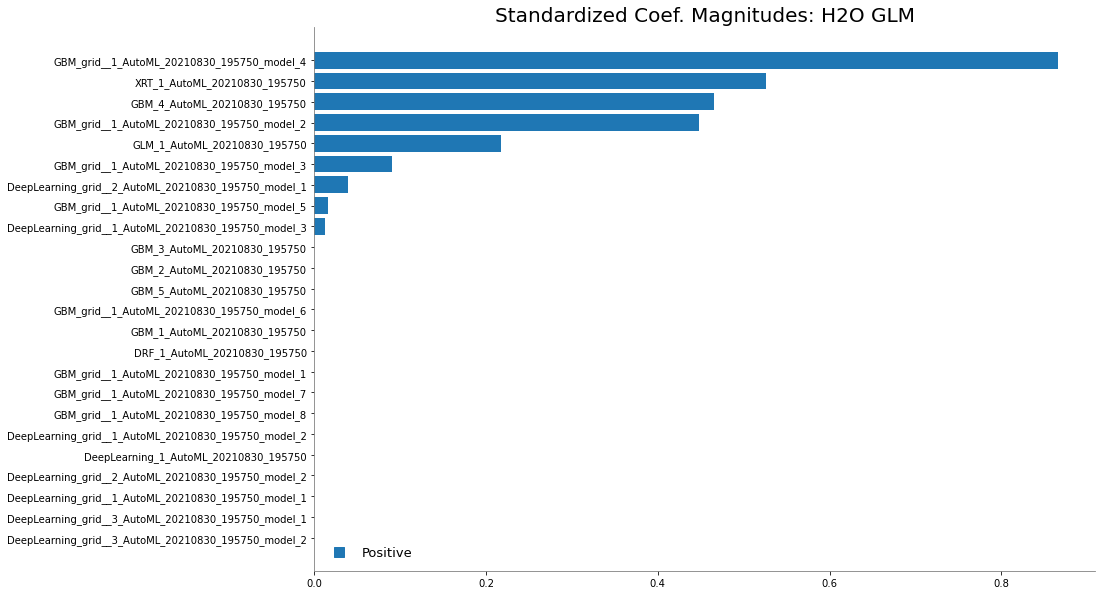

In [9]:
%matplotlib inline
metalearner.std_coef_plot()

In [10]:
pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,No,Yes
Yes,0.622246,0.377754
Yes,0.280024,0.719976
Yes,0.295806,0.704194
Yes,0.508278,0.491722
Yes,0.388036,0.611964
Yes,0.431272,0.568728
No,0.795451,0.204549
Yes,0.15965,0.84035
Yes,0.203001,0.796999
No,0.969397,0.0306035


In [ ]:
h2o.save_model(aml.leader, path="./product_backorders_model_bin")

### Test leader model

In [11]:
leader_model = aml.leader
leader_model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.04939003833413054
RMSE: 0.222238696752232
LogLoss: 0.16928515109884318
Null degrees of freedom: 3732
Residual degrees of freedom: 3723
Null deviance: 2767.869479758212
Residual deviance: 1263.8829381039634
AIC: 1283.8829381039634
AUC: 0.9514338010982307
AUCPR: 0.7697521681441439
Gini: 0.9028676021964614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29105332166392117: 


,,No,Yes,Error,Rate
0,No,3088.0,190.0,0.058,(190.0/3278.0)
1,Yes,89.0,366.0,0.1956,(89.0/455.0)
2,Total,3177.0,556.0,0.0747,(279.0/3733.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.291053,0.724036,212.0
1,max f2,0.205292,0.783476,244.0
2,max f0point5,0.611964,0.755102,118.0
3,max accuracy,0.491318,0.936512,150.0
4,max precision,0.990394,1.000000,0.0
5,max recall,0.004009,1.000000,389.0
6,max specificity,0.990394,1.000000,0.0
7,max absolute_mcc,0.491318,0.687978,150.0
8,max min_per_class_accuracy,0.108805,0.881319,284.0
9,max mean_per_class_accuracy,0.146355,0.885225,265.0



Gains/Lift Table: Avg response rate: 12.19 %, avg score: 12.06 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010179,0.924912,7.556680,7.556680,0.921053,0.947690,0.921053,0.947690,0.076923,0.076923,655.668016,655.668016,0.076008
1,2,0.020091,0.888126,6.873953,7.219868,0.837838,0.903634,0.880000,0.925955,0.068132,0.145055,587.395307,621.986813,0.142309
2,3,0.030003,0.855734,7.095693,7.178846,0.864865,0.872925,0.875000,0.908436,0.070330,0.215385,609.569350,617.884615,0.211114
3,4,0.040182,0.823767,7.340775,7.219868,0.894737,0.841126,0.880000,0.891385,0.074725,0.290110,634.077501,621.986813,0.284619
4,5,0.050094,0.772675,7.539174,7.283046,0.918919,0.795588,0.887701,0.872430,0.074725,0.364835,653.917434,628.304637,0.358429
5,6,0.100188,0.518330,5.571969,6.427508,0.679144,0.654563,0.783422,0.763496,0.279121,0.643956,457.196921,542.750779,0.619246
6,7,0.150013,0.286317,3.220005,5.362159,0.392473,0.397656,0.653571,0.641985,0.160440,0.804396,222.000473,436.215856,0.745213
7,8,0.200107,0.125993,1.360087,4.360301,0.165775,0.194954,0.531459,0.530078,0.068132,0.872527,36.008697,336.030128,0.765755
8,9,0.300027,0.040011,0.637875,3.120600,0.077748,0.071791,0.380357,0.377452,0.063736,0.936264,-36.212474,212.060047,0.724549
9,10,0.399946,0.021213,0.373927,2.434392,0.045576,0.029467,0.296718,0.290514,0.037363,0.973626,-62.607312,143.439200,0.653309


In [12]:
leader_model.varimp_plot()

TypeError: 'NoneType' object is not iterable

In [14]:
import pandas as pd
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_auprc_map = {'Model Id' : [], 'AUPRC' : []}
for mid in model_ids:
    model = h2o.get_model(mid)
    model_auprc_map['Model Id'].append(mid)
    model_auprc_map['AUPRC'].append(model.pr_auc(train))
model_auprc_df = pd.DataFrame(model_auprc_map)
model_auprc_df.sort_values(['AUPRC'], ascending=0, inplace=True)
model_auprc_df.head(20)

<ipython-input-14-101c9661824d>:7: H2ODeprecationWarning: ``ModelBase.pr_auc`` is deprecated, please use ``ModelBase.aucpr`` instead.
  model_auprc_map['AUPRC'].append(model.pr_auc(train))


,Model Id,AUPRC
1,StackedEnsemble_BestOfFamily_AutoML_20210830_195750,0.922935
0,StackedEnsemble_AllModels_AutoML_20210830_195750,0.915998
2,GBM_grid__1_AutoML_20210830_195750_model_4,0.891751
3,GBM_4_AutoML_20210830_195750,0.888438
4,GBM_grid__1_AutoML_20210830_195750_model_2,0.883914
6,GBM_grid__1_AutoML_20210830_195750_model_5,0.862647
7,GBM_3_AutoML_20210830_195750,0.846263
5,GBM_grid__1_AutoML_20210830_195750_model_3,0.798228
11,GBM_grid__1_AutoML_20210830_195750_model_6,0.794088
8,GBM_2_AutoML_20210830_195750,0.788494


Get GLM Info

In [26]:
best_auprc_model_id = model_auprc_df.iloc[15, 0]
best_auprc_model = h2o.get_model(best_auprc_model_id)
best_auprc_model.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.7900775857824894
RMSE: 0.8888630860725905
LogLoss: 4.316090878527566
Mean Per-Class Error: 0.272307893448833
AUC: 0.783843673105418
AUCPR: 0.3785928791515101
Gini: 0.567687346210836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.997798298842305: 


,,No,Yes,Error,Rate
0,No,2697.0,581.0,0.1772,(581.0/3278.0)
1,Yes,170.0,285.0,0.3736,(170.0/455.0)
2,Total,2867.0,866.0,0.2012,(751.0/3733.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.997798,0.431491,18.0
1,max f2,0.997733,0.539353,19.0
2,max f0point5,0.998650,0.414069,7.0
3,max accuracy,0.998905,0.885347,5.0
4,max precision,0.999917,0.769231,0.0
5,max recall,0.000003,1.000000,399.0
6,max specificity,0.999917,0.999085,0.0
7,max absolute_mcc,0.997798,0.348105,18.0
8,max min_per_class_accuracy,0.997637,0.716290,21.0
9,max mean_per_class_accuracy,0.997733,0.727692,19.0



Gains/Lift Table: Avg response rate: 12.19 %, avg score: 92.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010179,9.994649e-01,6.045344,6.045344,0.736842,0.999734,0.736842,0.999734,0.061538,0.061538,504.534413,504.534413,0.058488
1,2,0.020091,9.989592e-01,5.321770,5.688381,0.648649,0.999153,0.693333,0.999448,0.052747,0.114286,432.177012,468.838095,0.107269
2,3,0.030003,9.987746e-01,4.213068,5.201001,0.513514,0.998849,0.633929,0.999250,0.041758,0.156044,321.306801,420.100078,0.143536
3,4,0.040182,9.986525e-01,3.238577,4.703853,0.394737,0.998719,0.573333,0.999115,0.032967,0.189011,223.857721,370.385348,0.169487
4,5,0.050094,9.985772e-01,3.547847,4.475125,0.432432,0.998613,0.545455,0.999016,0.035165,0.224176,254.784675,347.512488,0.198245
5,6,0.100188,9.983213e-01,1.886572,3.180849,0.229947,0.998452,0.387701,0.998734,0.094505,0.318681,88.657225,218.084856,0.248822
6,7,0.150013,9.980600e-01,1.632057,2.666429,0.198925,0.998193,0.325000,0.998554,0.081319,0.400000,63.205719,166.642857,0.284686
7,8,0.200107,9.978379e-01,3.071164,2.767748,0.374332,0.997928,0.337349,0.998397,0.153846,0.553846,207.116413,176.774791,0.402839
8,9,0.300027,9.976612e-01,1.495708,2.344113,0.182306,0.997741,0.285714,0.998179,0.149451,0.703297,49.570751,134.411303,0.459245
9,10,0.399946,9.974291e-01,0.571888,1.901354,0.069705,0.997562,0.231748,0.998025,0.057143,0.760440,-42.811183,90.135357,0.410531


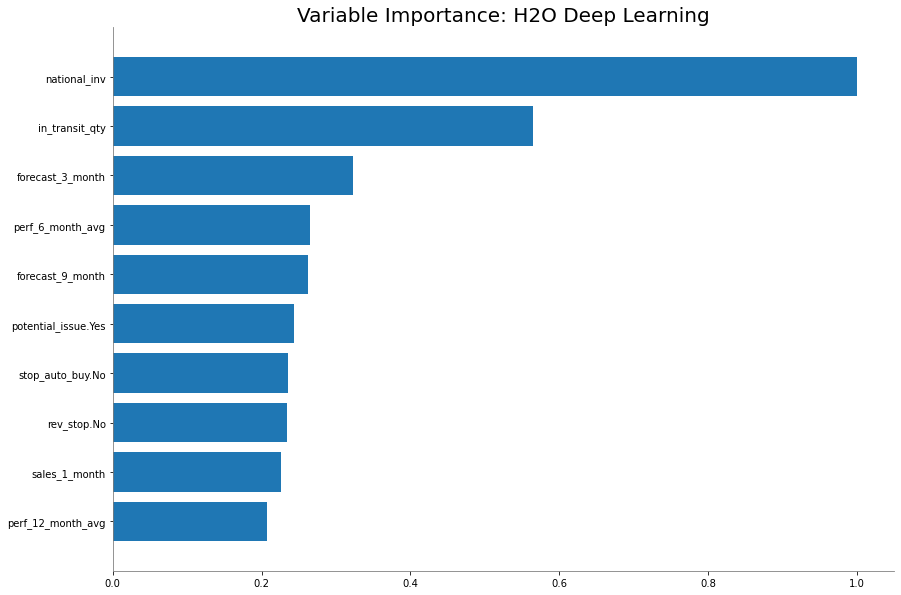

In [27]:
best_auprc_model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\h2o\model\model_base.py:1428: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [-1440.0 37094.84210526316 75629.68421052632 114164.52631578948
 152699.36842105264 191234.2105263158 229769.05263157896
 268303.89473684214 306838.7368421053 345373.5789473684 383908.4210526316
 422443.2631578948 460978.1052631579 499512.94736842107 538047.7894736843
 576582.6315789474 615117.4736842106 653652.3157894737 692187.1578947369
 730722.0] in fill_betweenx(). This will become an error two minor releases later.
  axs.fill_between(x, lower, upper, where=lower < upper, alpha=0.1, interpolate=False)


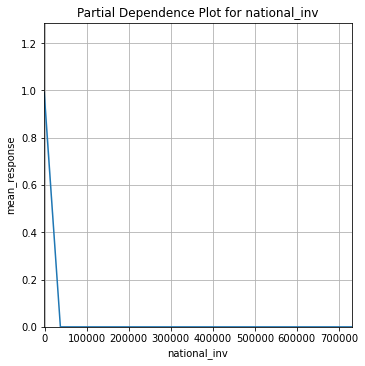

In [28]:
best_auprc_model.partial_plot(train, cols=["national_inv"], figsize=(5,5));

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_20210830_195750


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9978393910410043: 


,,No,Yes,Error,Rate
0,No,7217.0,1610.0,0.1824,(1610.0/8827.0)
1,Yes,438.0,767.0,0.3635,(438.0/1205.0)
2,Total,7655.0,2377.0,0.2041,(2048.0/10032.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

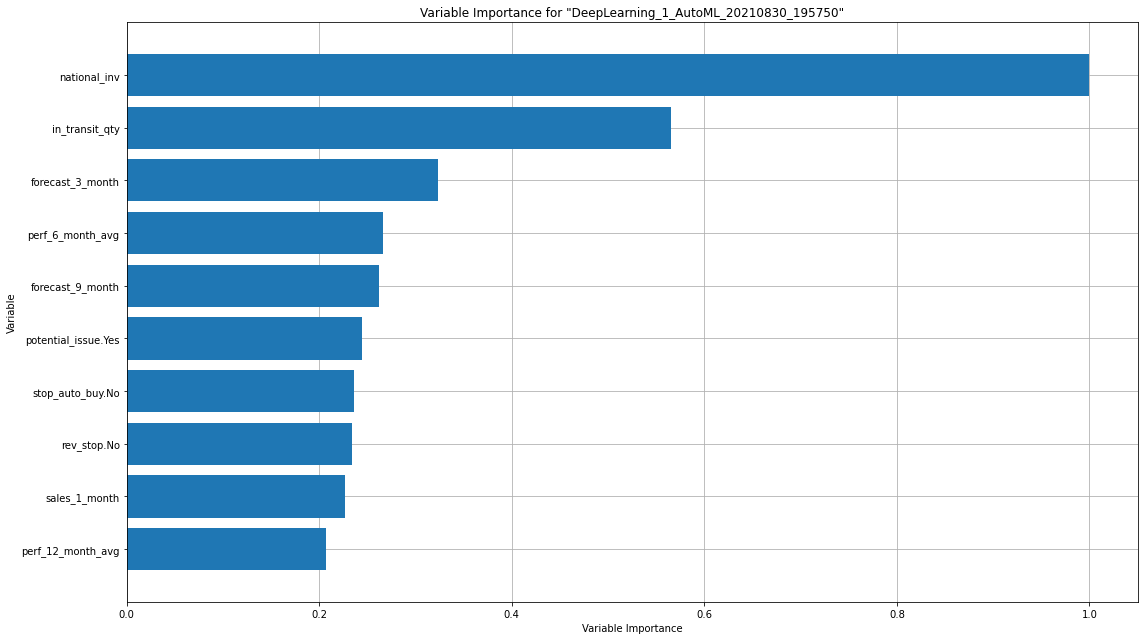

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

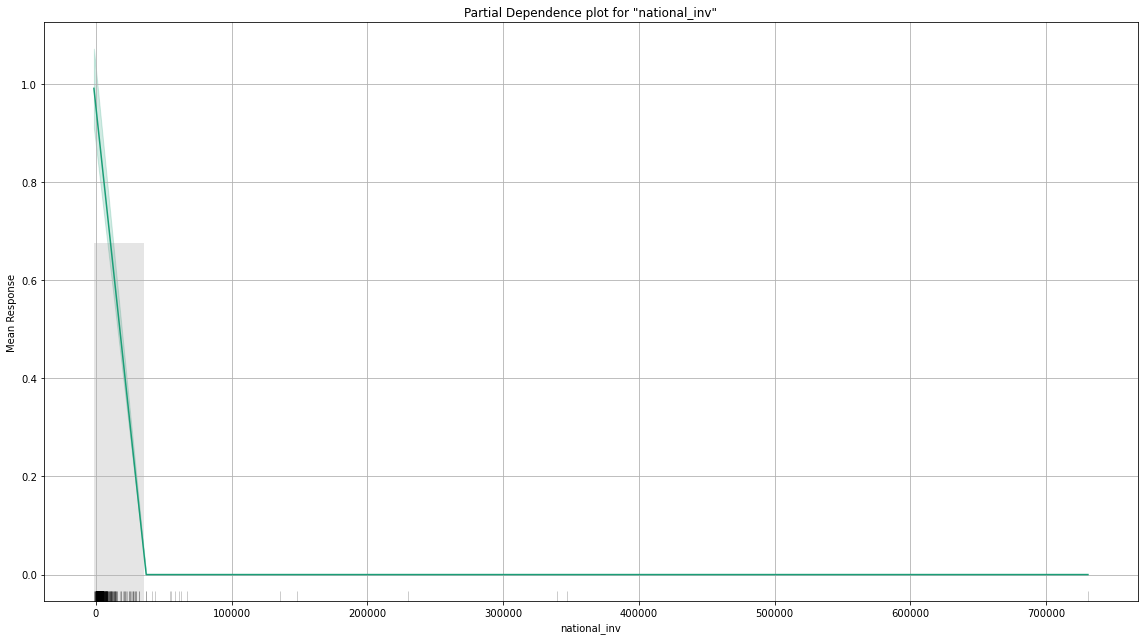

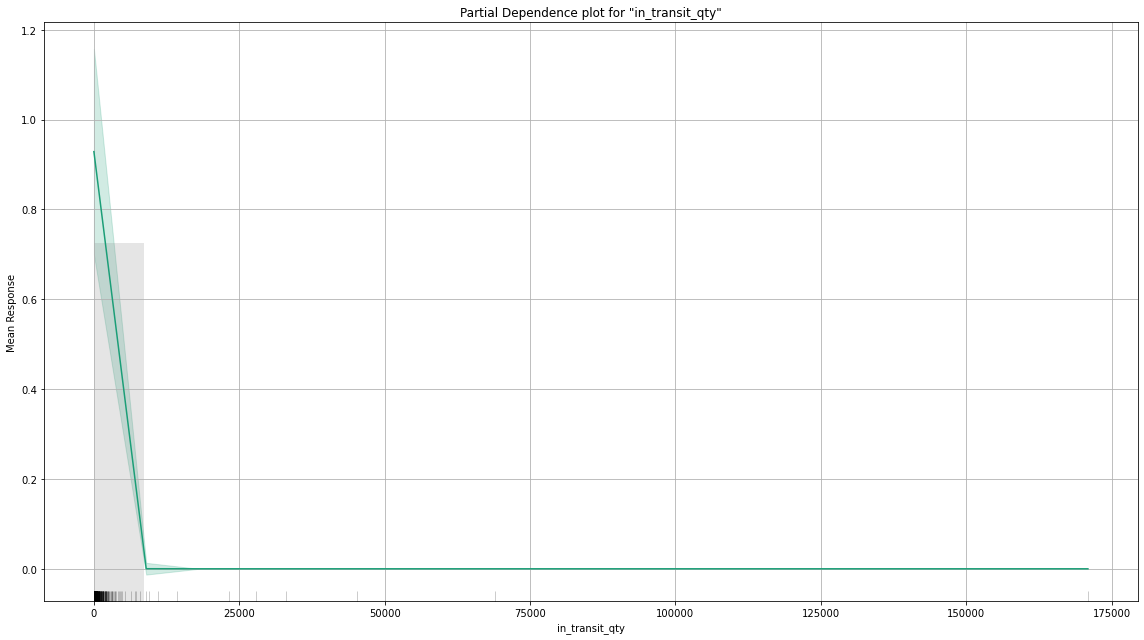

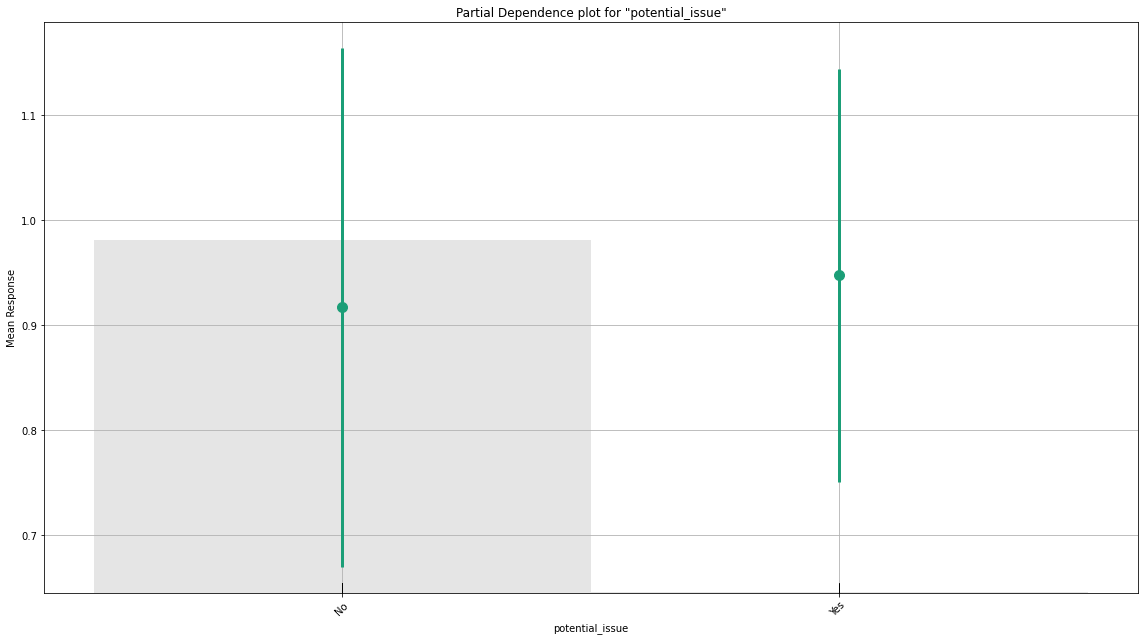

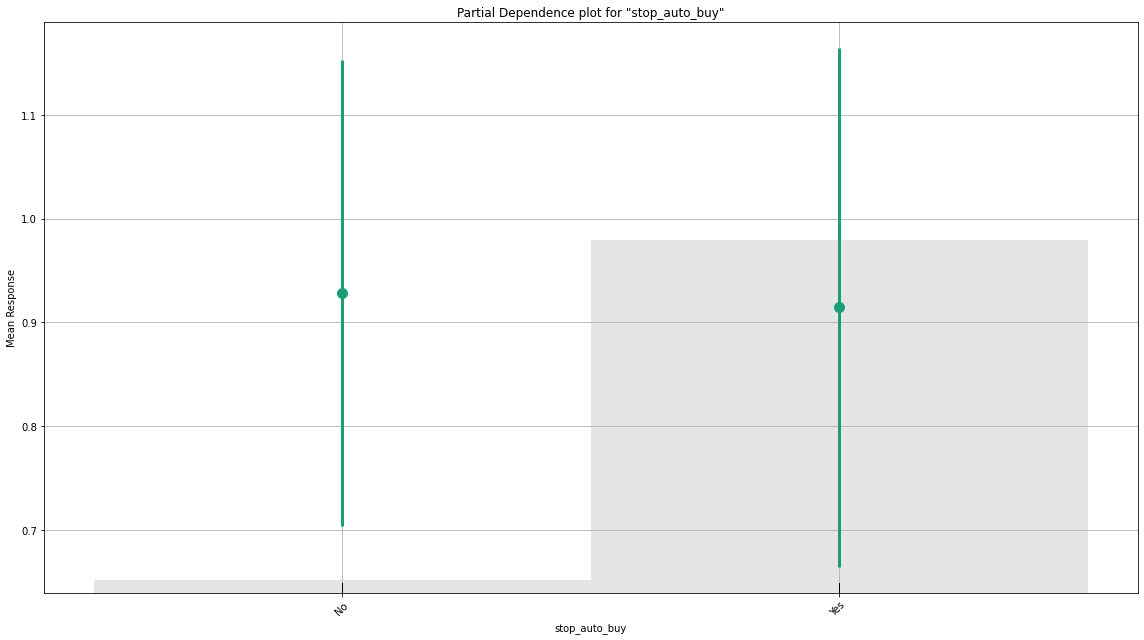

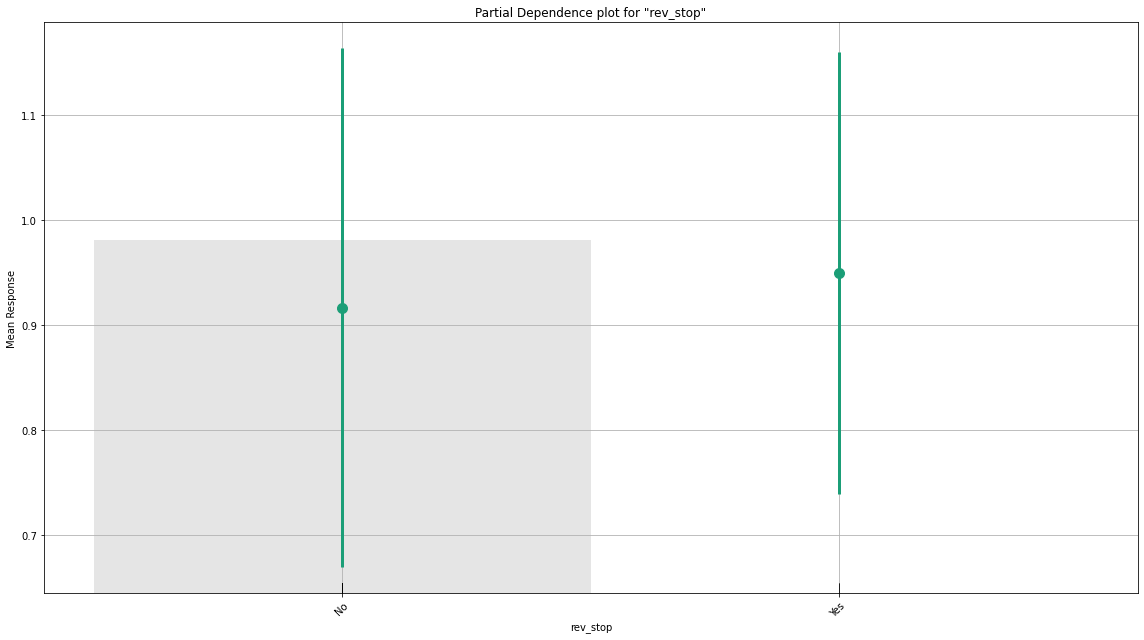

In [29]:
explain_model = best_auprc_model.explain(train)